# Boxplot de Metricas y comparacion de Subsets

En este notebook en primer lugar se llevara acabo la comparativa entre los distintos subsets ya elborados en el notebook "comparativa". Esta compaaración se realizara mediante el error cuadratico medio. 

En segundo lugar se representara graficamente todas las metricas utilizadas a traves de boxplot. Para este caso se utilizara el subset numero 2, que es el que mejor reproductividad local tiene.

Por ultimo, representamos el error cuadratico medio para cada estación en cada modelo.

- Primero cargaremos las librerias que son necesarias para la elaboracion de los grafismos.

In [1]:
library(loadeR)
library(magrittr)
require(transformeR)
require(downscaleR)
require(visualizeR)
require(climate4R.value)
require(downscaleR.keras)
library(ggplot2)
library(gridExtra)

Loading required package: rJava

Loading required package: loadeR.java

Java version 11x amd64 by Oracle Corporation detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.3 (2021-07-05) is loaded


Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.0 (2020-09-18) is loaded


Get the latest stable version (1.7.1) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Loading required package: downscaleR

downscaleR version 3.3.3 (2021-07-05) is loaded

Please use 'citation("downscaleR")' to cite this package.

Loading required package: visualizeR

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded

Please see 'citation("visualizeR")' to cite this package.

Loading required package: climate4R.value

Loading required package: VALUE

---------------------------------------------- 
| VALUE version 2.2.2 (2021-08-18) is loaded |
|         http://www.value-cost.eu           |
----------------------------------------------

Loading required package: downscaleR.keras

Loading required package: keras

Loading required package: tensorflow



- Cargamos todos los modelos que hemos generado anteriormente.

In [2]:
glm1 <- load('../GLM_1.rda') %>% get()
glm4 <- load('../GLM_4.rda') %>% get()
glm4lite <- load('../GLM_4Lite.rda') %>% get()
glm4plus <- load('../GLM_4plus.rda') %>% get()
glm16 <- load('../GLM_16.rda') %>% get()
nnss <- load('../nn-ss1.rda') %>% get()
nnss4 <- load('../nn-ss4.rda') %>% get()
nnss16 <- load('../nn-ss16.rda') %>% get()
cnnss <- load('../cnn-ss.rda') %>% get()
analogos <- load('../Analogos.rda') %>% get()

- Cargamos las regiones de estudio.

In [3]:
regiones <- read.csv('../regiones_VALUE_SAM.csv')

- Cargamos los predictores y predictando.

In [4]:
y <- load('../Data/y_sam.rda') %>% get()
x <- load('../Data/x_SAM.rda') %>% get()

### Comparacion de los 3 subsets

- Creamos las listas de los modelos y metricas que usaremos para la comparacion de los distintos subsets.

In [5]:
GLMS <- c("GLM_4Lite","GLM_4","GLM_4plus")
measures <- c("ts.RMSE",rep("bias",3))
index <- c(rep(NA,1),"Mean","P02","P98")

- Creamos un bucle que obtiene las metricas (RMSE, MeanBias, BiasP02, BiasP98) para cada uno de los modelos. 

In [7]:
validation.listglm <- lapply(1:length(measures), FUN = function(z) {
  lapply(1:length(GLMS), FUN = function(zz){
    args <- list()
    pred <- load(paste0("../",GLMS[zz],".rda")) %>% get()
    args[["y"]] <- y; args[["x"]] <- pred
    args[["measure.code"]] <- measures[z]
    if (!is.na(index[z])) args[["index.code"]] <- index[z]
    do.call("valueMeasure",args)$Measure
  }) %>% makeMultiGrid()
})
#save(validation.listglm, file = "validationglm.rda")

[2022-09-16 10:23:58] Computing member 1 out of 1

[2022-09-16 10:23:58] Done.

[2022-09-16 10:24:08] Computing member 1 out of 1

[2022-09-16 10:24:08] Done.

[2022-09-16 10:24:17] Computing member 1 out of 1

[2022-09-16 10:24:18] Done.

[2022-09-16 10:24:18] Computing member 1 out of 1

[2022-09-16 10:24:18] Done.

[2022-09-16 10:24:18] Computing member 1 out of 1

[2022-09-16 10:24:18] Done.

[2022-09-16 10:24:18] Computing member 1 out of 1

[2022-09-16 10:24:19] Done.

[2022-09-16 10:24:19] Computing member 1 out of 1

[2022-09-16 10:24:19] Done.

[2022-09-16 10:24:19] Computing member 1 out of 1

[2022-09-16 10:24:19] Done.

[2022-09-16 10:24:19] Computing member 1 out of 1

[2022-09-16 10:24:19] Done.

[2022-09-16 10:24:20] Computing member 1 out of 1

[2022-09-16 10:24:20] Done.

[2022-09-16 10:24:20] Computing member 1 out of 1

[2022-09-16 10:24:20] Done.

[2022-09-16 10:24:20] Computing member 1 out of 1

[2022-09-16 10:24:20] Done.

[2022-09-16 10:24:21] Computing member 1

- Cargamos el archivo con las metricas.

In [8]:
valglm <- load("../validationglm.rda") %>% get()

- Iteramos un bucle para obtener el RMSE de cada uno de los modelos divididos en las distintas regiones.

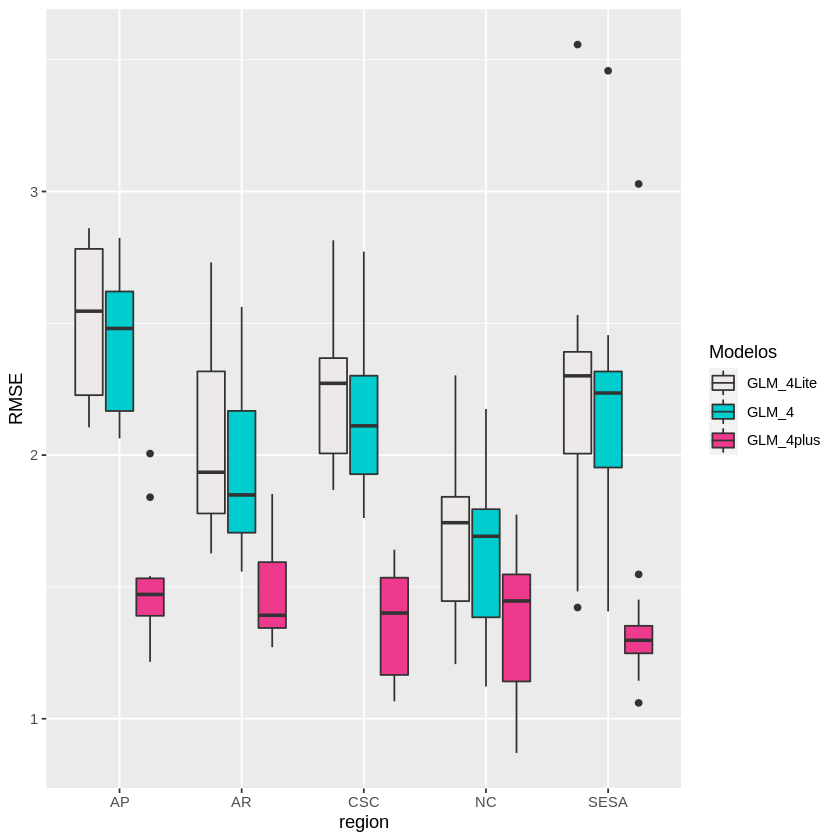

In [9]:
RMSE <-  c()
for(i in 1:length(GLMS)){
    
    for (reg in c('SESA','AR','AP','NC','CSC')){
        
        region <- subset(regiones, regiones$Region == reg)
        RMSE_region <- subsetGrid(valglm[[1]], station.id = region[,1])$Data[i,]
        RMSE_datos <- cbind(rep(GLMS[i],length(RMSE_region)),rep(reg,length(RMSE_region)),RMSE_region)
        RMSE <- rbind(RMSE,RMSE_datos)
        
    }
}


RMSE <- data.frame(GLMs=RMSE[,1], region= RMSE[,2], RMSE=as.numeric(RMSE[,3]))



#pdf('Boxplot_comparacion.pdf')
ggplot(RMSE, aes(x = region, y = RMSE, fill = factor(GLMs,levels=GLMS))) + geom_boxplot() + 
scale_fill_manual(values=c("#EEE9E9","#00CDCD","#EE3A8C")) + labs(fill='Modelos')

#dev.off()

Se selcciona el subset numero 2 (GLM_4). Aunque el subset 3 (GLM_4plus) tenga mejores resultados es descartado debido a que posee colinealidad. Ver en las memorias para más información.

### Boxplot de métricas

- Generamos listas con los modelos que utilizaremos asi como las métricas. Acontinuación los bucles iteraran sobre estas listas.

In [10]:
models <- c("GLM_1","GLM_4","GLM_16",
            "nn-ss1","nn-ss4","nn-ss16","cnn-ss","Analogos")
modelos <- c("GLM_1","GLM_4","GLM_4Lite","GLM_4plus","GLM_16",
            "nn-ss1","nn-ss4","nn-ss16","cnn-ss","Analogos")
GLMS <- c("GLM_4Lite","GLM_4","GLM_4Plus")
measures <- c("ts.RMSE",rep("bias",3))
index <- c(rep(NA,1),"Mean","P02","P98")

- Creamos un archivo .rda mediante un bucle que nos retorna las métricas para cada uno de nuestros modelos. 

In [11]:
validation.list <- lapply(1:length(measures), FUN = function(z) {
  lapply(1:length(models), FUN = function(zz){
    args <- list()
    pred <- load(paste0("../",models[zz],".rda")) %>% get()
    args[["y"]] <- y; args[["x"]] <- pred
    args[["measure.code"]] <- measures[z]
    if (!is.na(index[z])) args[["index.code"]] <- index[z]
    do.call("valueMeasure",args)$Measure
  }) %>% makeMultiGrid()
})

[2022-09-16 10:25:44] Computing member 1 out of 1

[2022-09-16 10:25:44] Done.

[2022-09-16 10:25:53] Computing member 1 out of 1

[2022-09-16 10:25:53] Done.

[2022-09-16 10:26:03] Computing member 1 out of 1

[2022-09-16 10:26:04] Done.

[2022-09-16 10:26:13] Computing member 1 out of 1

[2022-09-16 10:26:13] Done.

[2022-09-16 10:26:22] Computing member 1 out of 1

[2022-09-16 10:26:23] Done.

[2022-09-16 10:26:32] Computing member 1 out of 1

[2022-09-16 10:26:32] Done.

[2022-09-16 10:26:41] Computing member 1 out of 1

[2022-09-16 10:26:42] Done.

[2022-09-16 10:26:50] Computing member 1 out of 1

[2022-09-16 10:26:51] Done.

[2022-09-16 10:26:51] Computing member 1 out of 1

[2022-09-16 10:26:51] Done.

[2022-09-16 10:26:51] Computing member 1 out of 1

[2022-09-16 10:26:52] Done.

[2022-09-16 10:26:52] Computing member 1 out of 1

[2022-09-16 10:26:52] Done.

[2022-09-16 10:26:52] Computing member 1 out of 1

[2022-09-16 10:26:52] Done.

[2022-09-16 10:26:52] Computing member 1

- Cargamos dicho archivo.

In [12]:
val <- load('../validation.rda') %>% get()

- Genereamos 4 paneles, uno para cada métrica(RMSE, MeanBias, BiasP02, BiasP98). Estos paneles representaran cada uno de nuestros modelos y su métricas divididos en columnas por cada región.

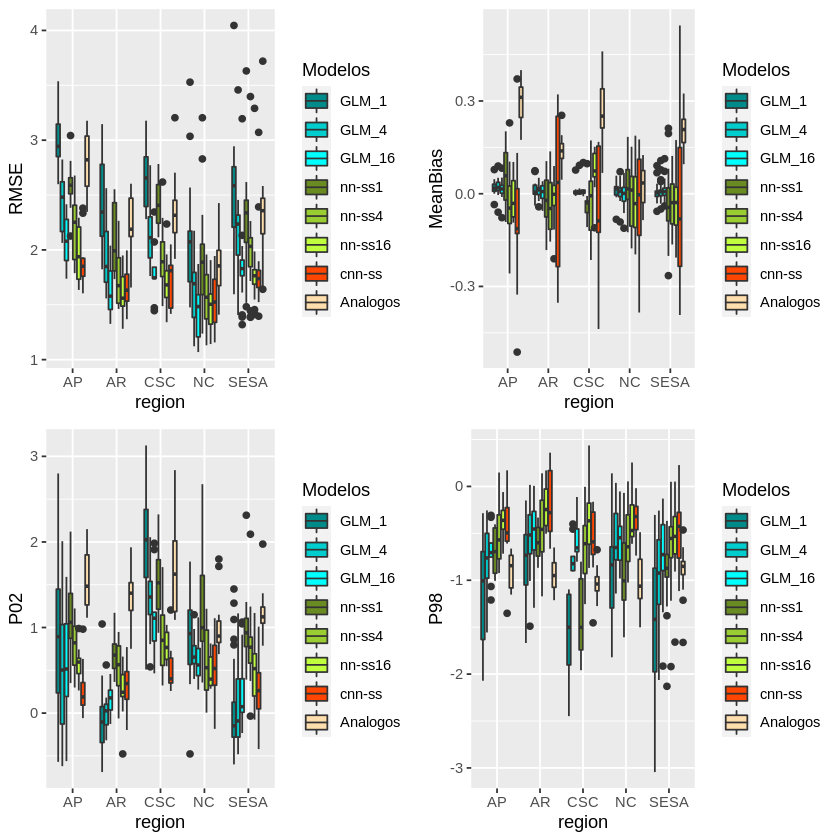

In [13]:
RMSE <- P02 <- P98 <- MeanBias<- c()
for(i in 1:length(models)){
    
    for (reg in c('SESA','AR','AP','NC','CSC')){
        
        region <- subset(regiones, regiones$Region == reg)
        
        RMSE_region <- subsetGrid(val[[1]], station.id = region[,1])$Data[i,]
        RMSE_datos <- cbind(rep(models[i],length(RMSE_region)),rep(reg,length(RMSE_region)),RMSE_region)
        RMSE <- rbind(RMSE,RMSE_datos)
        
        
        MeanBias_region <- subsetGrid(val[[2]], station.id = region[,1])$Data[i,]
        MeanBias_datos <- cbind(rep(models[i],length(MeanBias_region)),rep(reg,length(MeanBias_region)),MeanBias_region)
        MeanBias <- rbind(MeanBias,MeanBias_datos)
        
        P02_region <- subsetGrid(val[[3]], station.id = region[,1])$Data[i,]
        P02_datos <- cbind(rep(models[i],length(P02_region)),rep(reg,length(P02_region)),P02_region)
        P02 <- rbind(P02,P02_datos)
        
        P98_region <- subsetGrid(val[[4]], station.id = region[,1])$Data[i,]
        P98_datos <- cbind(rep(models[i],length(P98_region)),rep(reg,length(P98_region)),P98_region)
        P98 <- rbind(P98,P98_datos)
    }
}


RMSE <- data.frame(modelo=RMSE[,1], region= RMSE[,2], RMSE=as.numeric(RMSE[,3]))

MeanBias <- data.frame(modelo=MeanBias[,1], region= MeanBias[,2], MeanBias=as.numeric(MeanBias[,3]))
P02 <- data.frame(modelo=P02[,1], region= P02[,2], P02=as.numeric(P02[,3]))
P98 <- data.frame(modelo=P98[,1], region= P98[,2], P98=as.numeric(P98[,3]))


#pdf('Boxplot.pdf',width = 17,height = 10)


Panel1<-ggplot(RMSE, aes(x = region, y = RMSE, fill = factor(modelo,level=models))) + geom_boxplot() + 
scale_fill_manual(values=c("#008B8B", "#00CDCD","#00FFFF","#698B22", "#9ACD32","#C0FF3E", "#FF4500","#FFDEAD")) + labs(fill='Modelos') 

Panel2<-ggplot(MeanBias, ylim=c(-2,2), aes(x = region, y = MeanBias, fill = factor(modelo,level=models))) + geom_boxplot()+ 
scale_fill_manual(values=c("#008B8B", "#00CDCD","#00FFFF","#698B22", "#9ACD32","#C0FF3E", "#FF4500","#FFDEAD")) + labs(fill='Modelos')

Panel3<-ggplot(P02, aes(x = region, y = P02, fill = factor(modelo,level=models))) + geom_boxplot()+ 
scale_fill_manual(values=c("#008B8B", "#00CDCD","#00FFFF","#698B22", "#9ACD32","#C0FF3E", "#FF4500","#FFDEAD")) + labs(fill='Modelos')

Panel4<-ggplot(P98, aes(x = region, y = P98, fill = factor(modelo,level=models))) + geom_boxplot() + 
scale_fill_manual(values=c("#008B8B", "#00CDCD","#00FFFF","#698B22", "#9ACD32","#C0FF3E", "#FF4500","#FFDEAD")) + labs(fill='Modelos')


figuras_lista <- list(Panel1, Panel2,Panel3,Panel4)
library(gridExtra)
grid.arrange(grobs = figuras_lista, ncol = 2) 
#dev.off()


- Por último obtendremos un gráfico del RMSE para cada una de las estaciones meteorológicas en cada modelo.
- Los modelos corresponden a la siguiente nomenclatura: x = GLM1; x.1 = GLM4; x.2 = GLM16; x.3 = NN; x.4 = NN4; x.5 = NN16; x.6 = CNN; x.7 = Análogos.

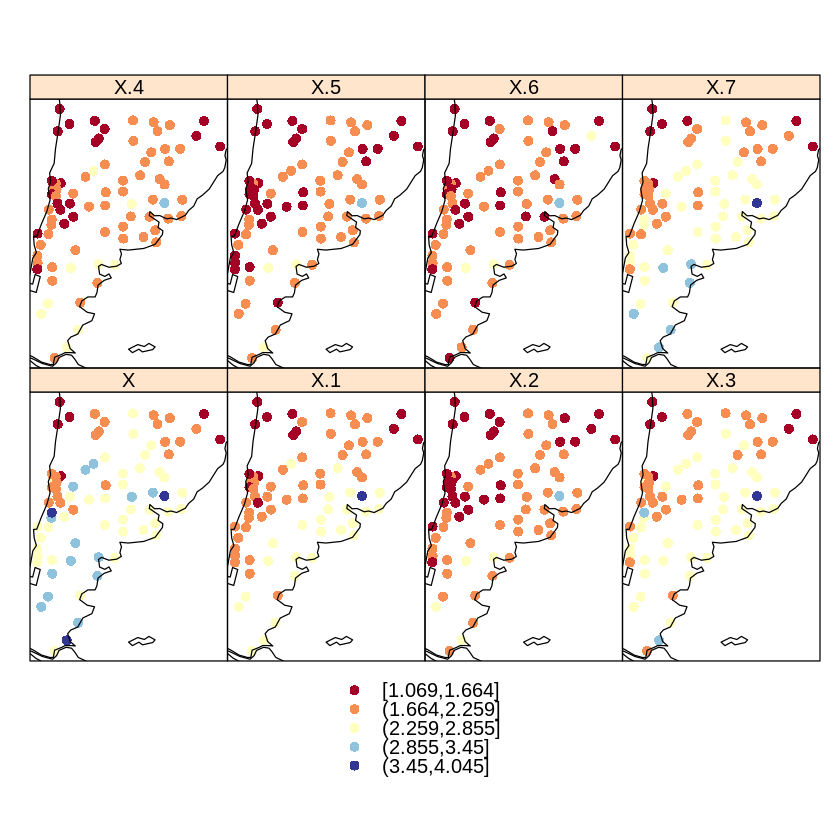

In [14]:
#pdf('Estaciones.pdf')
spatialPlot(val[[1]], backdrop.theme = 'coastline')
#dev.off()